<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 1 декабря 23:59 [уточняется]**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
!python.exe -m pip install --upgrade pip

/bin/bash: line 1: python.exe: command not found


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [6]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8b962233b7bca0e70070c66b8e40417da291002321b4fad0836c4b9dfef9bf56
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn import impute
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)
# сиды фиксируем, чтобы при повторном разбиении данных у нас не менялись выборки.

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [8]:
df_train_original = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test_original = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train_original.shape)
print("Test data shape: ", df_test_original.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [9]:
# 10 случайных строк
df_train_original.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [10]:
# первые 5 объектов тестового датасета
df_test_original.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [11]:
# последние 5 объектов тестового датасета
df_test_original.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [12]:
# проверка на пропуски
df_train_original.count()

,0
name,6999
year,6999
selling_price,6999
km_driven,6999
fuel,6999
seller_type,6999
transmission,6999
owner,6999
mileage,6797
engine,6797


In [13]:
# список столбцов, в которых есть пропуски
columns_null_list = df_train_original.columns[df_train_original.isnull().any()].tolist()
print(columns_null_list)

['mileage', 'engine', 'max_power', 'torque', 'seats']


In [14]:
# проверка на явные дубликаты
df_train_original.duplicated().sum()

985

In [15]:
# Дашборд
profile = ProfileReport(df_train_original, title="Profiling Report")
profile.to_file("cars_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [16]:
df_train_original.shape

(6999, 13)

In [17]:
# исключили целевую переменную
X = df_train_original.drop('selling_price', axis=1)
y = df_train_original['selling_price']

In [18]:
# проверка на наличие дубликатов, их 1159
X.duplicated(subset=X.columns).sum()

1159

In [19]:
# Отображение дубликатов
X[X.duplicated() == True]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [20]:
# Удаляем повторящиеся строки и оставляем первую строку в случае одинакового признакового описания цен на автомобили
df_train_original = df_train_original.drop_duplicates(subset=X.columns, keep='first')

In [21]:
df_train_original[df_train_original.duplicated() == True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [22]:
# обновляем индексы
df_train_original = df_train_original.reset_index(drop=True)

In [23]:
assert df_train_original.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [24]:
# создадим копию датасетов для сравнения корректности данных до изменений и после изменений
df_train = df_train_original.copy(deep=True)
df_test = df_test_original.copy(deep=True)

In [25]:
# уберем единицы измерения для признаков mileage, engine, max_power и заменим строки с NaN вначале на -1, а затем на медианное значение
# так как в столбце max_power присутствует 'bhp' не разделенное пробелом со значением, то замним его на медианное значение, это будет не критично, так как такое значение
# всего одно. Лучше ничего не придумал :D
# и приведем к типу float
# в тесте пропуски заменим на медианное значение из трейна

In [26]:
df_train['mileage'] = df_train['mileage'].apply(lambda string: string.split()[0] if isinstance(string, str) and len(string) > 3 else -1)
df_train['mileage'] = df_train['mileage'].apply(lambda val: df_train[df_train['mileage'] != -1]['mileage'].astype(float).median() if  val == -1 else val)
df_train['mileage'] = df_train['mileage'].astype(float)

In [27]:
df_train['engine'] = df_train['engine'].apply(lambda string: string.split()[0] if isinstance(string, str) and len(string) > 3 else -1)
df_train['engine'] = df_train['engine'].apply(lambda val: df_train[df_train['engine'] != -1]['engine'].astype(float).median() if  val == -1 else val)
df_train['engine'] = df_train['engine'].astype(float)

In [28]:
df_train['max_power'] = df_train['max_power'].apply(lambda string: string.split()[0] if isinstance(string, str) and len(string) > 3 and 'bhp' not in string.split()[0] else -1)
df_train['max_power'] = df_train['max_power'].apply(lambda val: df_train[df_train['max_power'] != -1]['max_power'].astype(float).median() if  val == -1 else val)
df_train['max_power'] = df_train['max_power'].astype(float)

In [29]:
df_test['mileage'] = df_test['mileage'].apply(lambda string: string.split()[0] if isinstance(string, str) and len(string) > 3 else -1)
df_test['mileage'] = df_test['mileage'].apply(lambda val: df_train['mileage'].astype(float).median() if  val == -1 else val)
df_test['mileage'] = df_test['mileage'].astype(float)

In [30]:
df_test['engine'] = df_test['engine'].apply(lambda string: string.split()[0] if isinstance(string, str) and len(string) > 3 else -1)
df_test['engine'] = df_test['engine'].apply(lambda val: df_train['engine'].astype(float).median() if  val == -1 else val)
df_test['engine'] = df_test['engine'].astype(float)

In [31]:
df_test['max_power'] = df_test['max_power'].apply(lambda string: string.split()[0] if isinstance(string, str) and len(string) > 3 and 'bhp' not in string.split()[0] else -1)
df_test['max_power'] = df_test['max_power'].apply(lambda val: df_train['max_power'].astype(float).median() if  val == -1 else val)
df_test['max_power'] = df_test['max_power'].astype(float)

In [32]:
# пропуски остались в torque и seats
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5653 non-null   object 
 12  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 593.2+ KB


In [33]:
# разделим столбец torque на два столбца: torque_nm и torque_rpm.
# переведем значения из kgm к nm (1 kgm ~ 9.8 nm)
# в ячейках, где значение записано через дефис, вычислим среднее между ними
# все значения приведем к типу float и округлим до трех знаков после запятой
# для удаления строковых символов и заменой , на . воспользуемся регулярным выражением
# заменим строки с nan на -1, а затем на медианное значение
# удалим столбец torque

In [34]:
# функция для получения из строки списка float
def get_nums(val:str)->list[float]:
    val = re.sub(r',', '.', val)
    val = re.findall(r'[0-9]*\.?[0-9]+',val)
    return list(map(float,val))

In [35]:
# получение числовых значений из столбца torque и приведение к одинаковым единицам измерения
def get_val_torque(df):
    NM = 9.8
    nums1 = []
    nums2 = []
    for val in df['torque']:
        if isinstance(val, float):
            num1 = -1.0
            num2 = -1.0
        else:
            nums = get_nums(val)
            num1 = nums[0]
            if len(nums) != 1:
                num2 = nums[1]
                if len(nums) == 3:
                    num2 = round((nums[1] + nums[2]) /2, 3)
                val = val.lower()
            if 'kgm' in val:
                num1 *= NM
        nums1.append(num1)
        nums2.append(num2)
    return nums1, nums2

In [36]:
df_train['torque_nm'], df_train['torque_rpm'] = get_val_torque(df_train)
df_train = df_train.drop('torque', axis = 1)

In [37]:
# замена пропусков в трейне на медианные значения
df_train['torque_nm'] = df_train['torque_nm'].apply(lambda val:df_train[df_train['torque_nm'] != -1]['torque_nm'].astype(float).median() if val == -1 else val)
df_train['torque_rpm'] = df_train['torque_rpm'].apply(lambda val:df_train[df_train['torque_rpm'] != -1]['torque_rpm'].astype(float).median() if val == -1 else val)

In [38]:
df_test['torque_nm'], df_test['torque_rpm'] = get_val_torque(df_test_original)
df_test = df_test.drop('torque', axis = 1)

In [39]:
# замена пропусков в тесте на медианные значения из трейна
df_test['torque_nm'] = df_test['torque_nm'].apply(lambda val:df_train['torque_nm'].astype(float).median() if val == -1 else val)
df_test['torque_rpm'] = df_test['torque_rpm'].apply(lambda val:df_train['torque_rpm'].astype(float).median() if val == -1 else val)

In [40]:
# проверка на оставшиеся пропуски, остались в seats
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5654 non-null   float64
 12  torque_nm      5840 non-null   float64
 13  torque_rpm     5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [41]:
df_train['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [42]:
# engine к типу int
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

In [43]:
# seats к типу int
df_train['seats'] = df_train['seats'].apply(lambda val: df_train[df_train['seats'].isna() == False]['seats'].median() if  math.isnan(val) == True else val)
df_train['seats'] = df_train['seats'].astype(int)

In [44]:
df_test['seats'] = df_test['seats'].apply(lambda val: df_train['seats'].median() if math.isnan(val) == True else val)
df_test['seats'] = df_test['seats'].astype(int)

In [45]:
# проверка, что преобразования выполнились
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
 12  torque_nm      5840 non-null   float64
 13  torque_rpm     5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [46]:
# до изменений числовых столбцов
df_train_original.describe(include='number')

,year,selling_price,km_driven,seats
count,5840.000000,5.840000e+03,5.840000e+03,5654.00000
mean,2013.428425,5.229601e+05,7.395224e+04,5.44075
std,4.095622,5.354320e+05,6.007114e+04,0.99527
min,1983.000000,2.999900e+04,1.000000e+00,2.00000
25%,2011.000000,2.500000e+05,3.900000e+04,5.00000
50%,2014.000000,4.050000e+05,7.000000e+04,5.00000
75%,2017.000000,6.400000e+05,1.000000e+05,5.00000
max,2020.000000,1.000000e+07,2.360457e+06,14.00000


In [47]:
# после изменений
df_train.describe(include='number')

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.948422,5.426712,175.919680,2701.909623
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.577884,0.982344,116.714313,1105.181430
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,47.040000,1.800000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000,111.800000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000,160.000000,2375.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000,200.000000,3500.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,3724.000000,5000.000000


In [48]:
df_test_original.describe(include='number')

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [49]:
df_test.describe(include='number')

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,5.403000,177.608530,2766.779115
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,0.912921,103.711762,1085.347329
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,4.000000,48.000000,1.950000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,5.000000,111.700000,2000.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,5.000000,160.000000,2400.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,5.000000,205.000000,3800.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,9.000000,1421.000000,5000.000000


In [50]:
df_train_original.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,5840,5840,5840,5840,5840,5654,5654,5657,5653
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,91,3177,5223,5336,3603,175,758,260,390


In [51]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [52]:
df_test_original.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [53]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [54]:
# assert df_train.shape == (5840, 13)

In [55]:
# в df_train, количество столбцов изменилось, так torque имело две характеристики -> мы разбили на два столбца torque_nm	torque_rpm. toraue удалили, получилась прибавка в один столбец
assert df_train.shape == (5840, 14)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

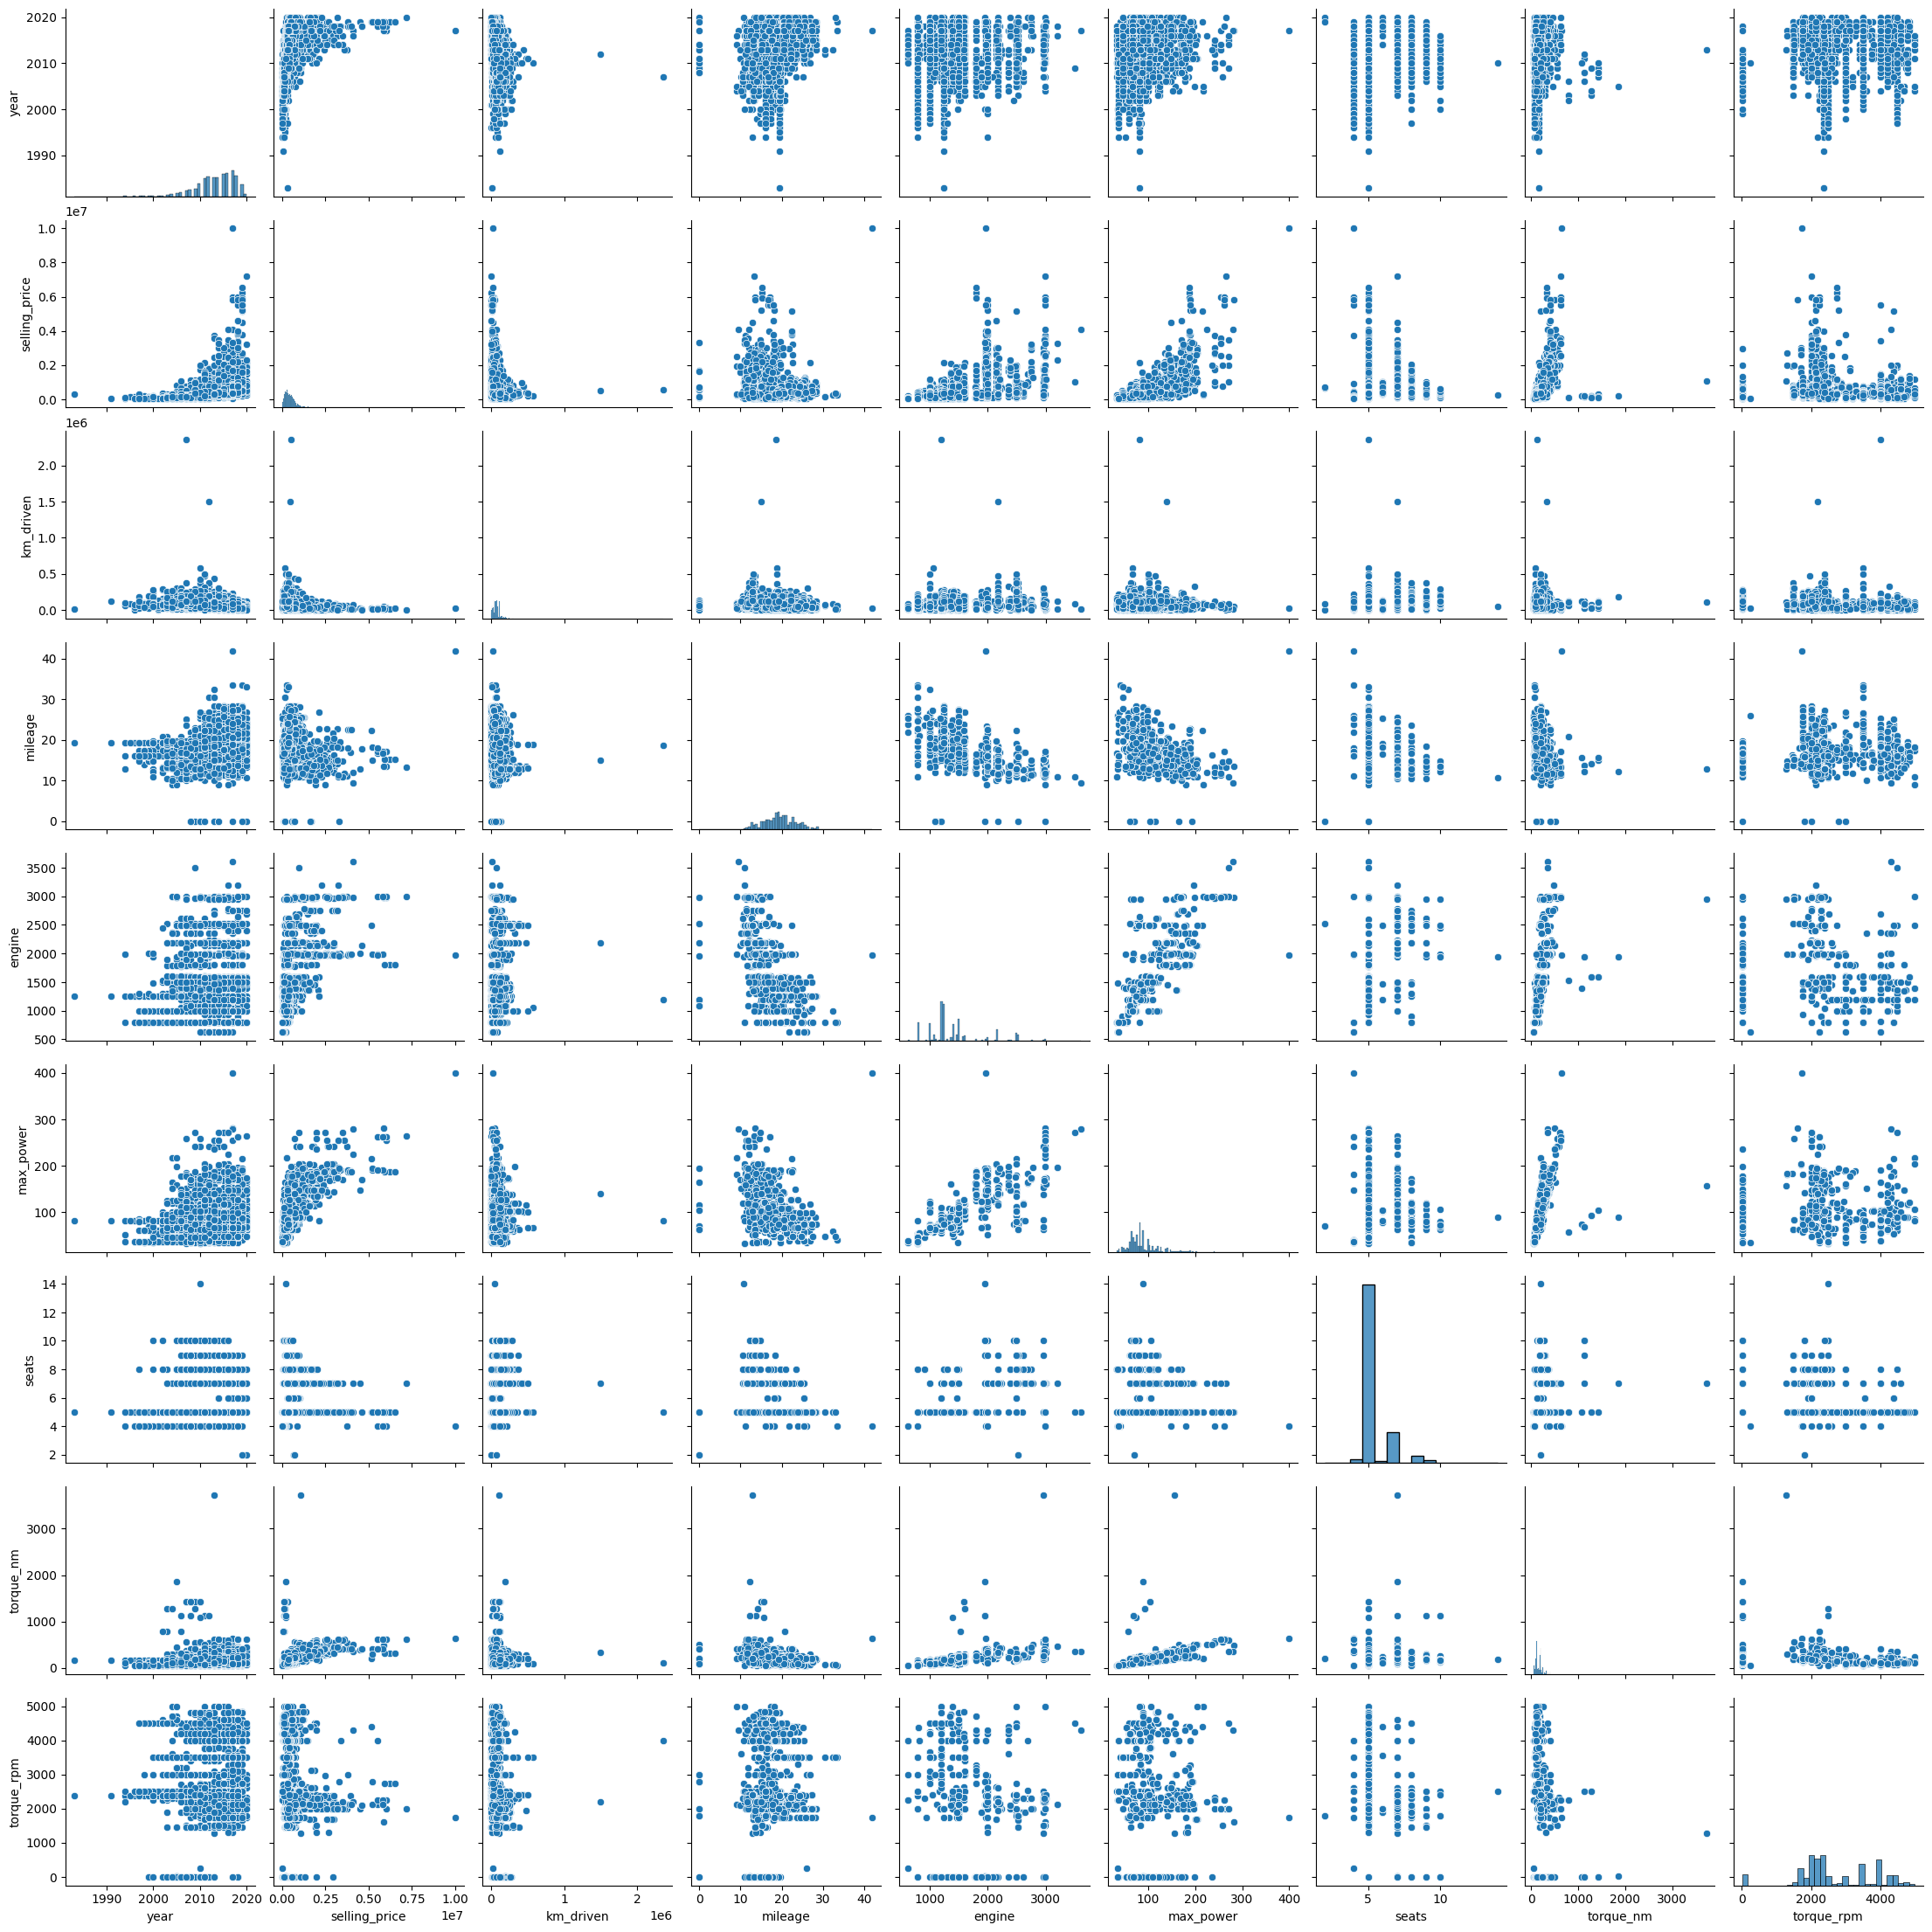

In [56]:
# попарные распределения числовых признаков
sns.pairplot(df_train)

In [57]:
# 1. Связь с целевой переменной прослеживается у year, max_power, engine, torque_nm
# 2. Положительная корреляция наблюдается между engine, max_power и torque_nm

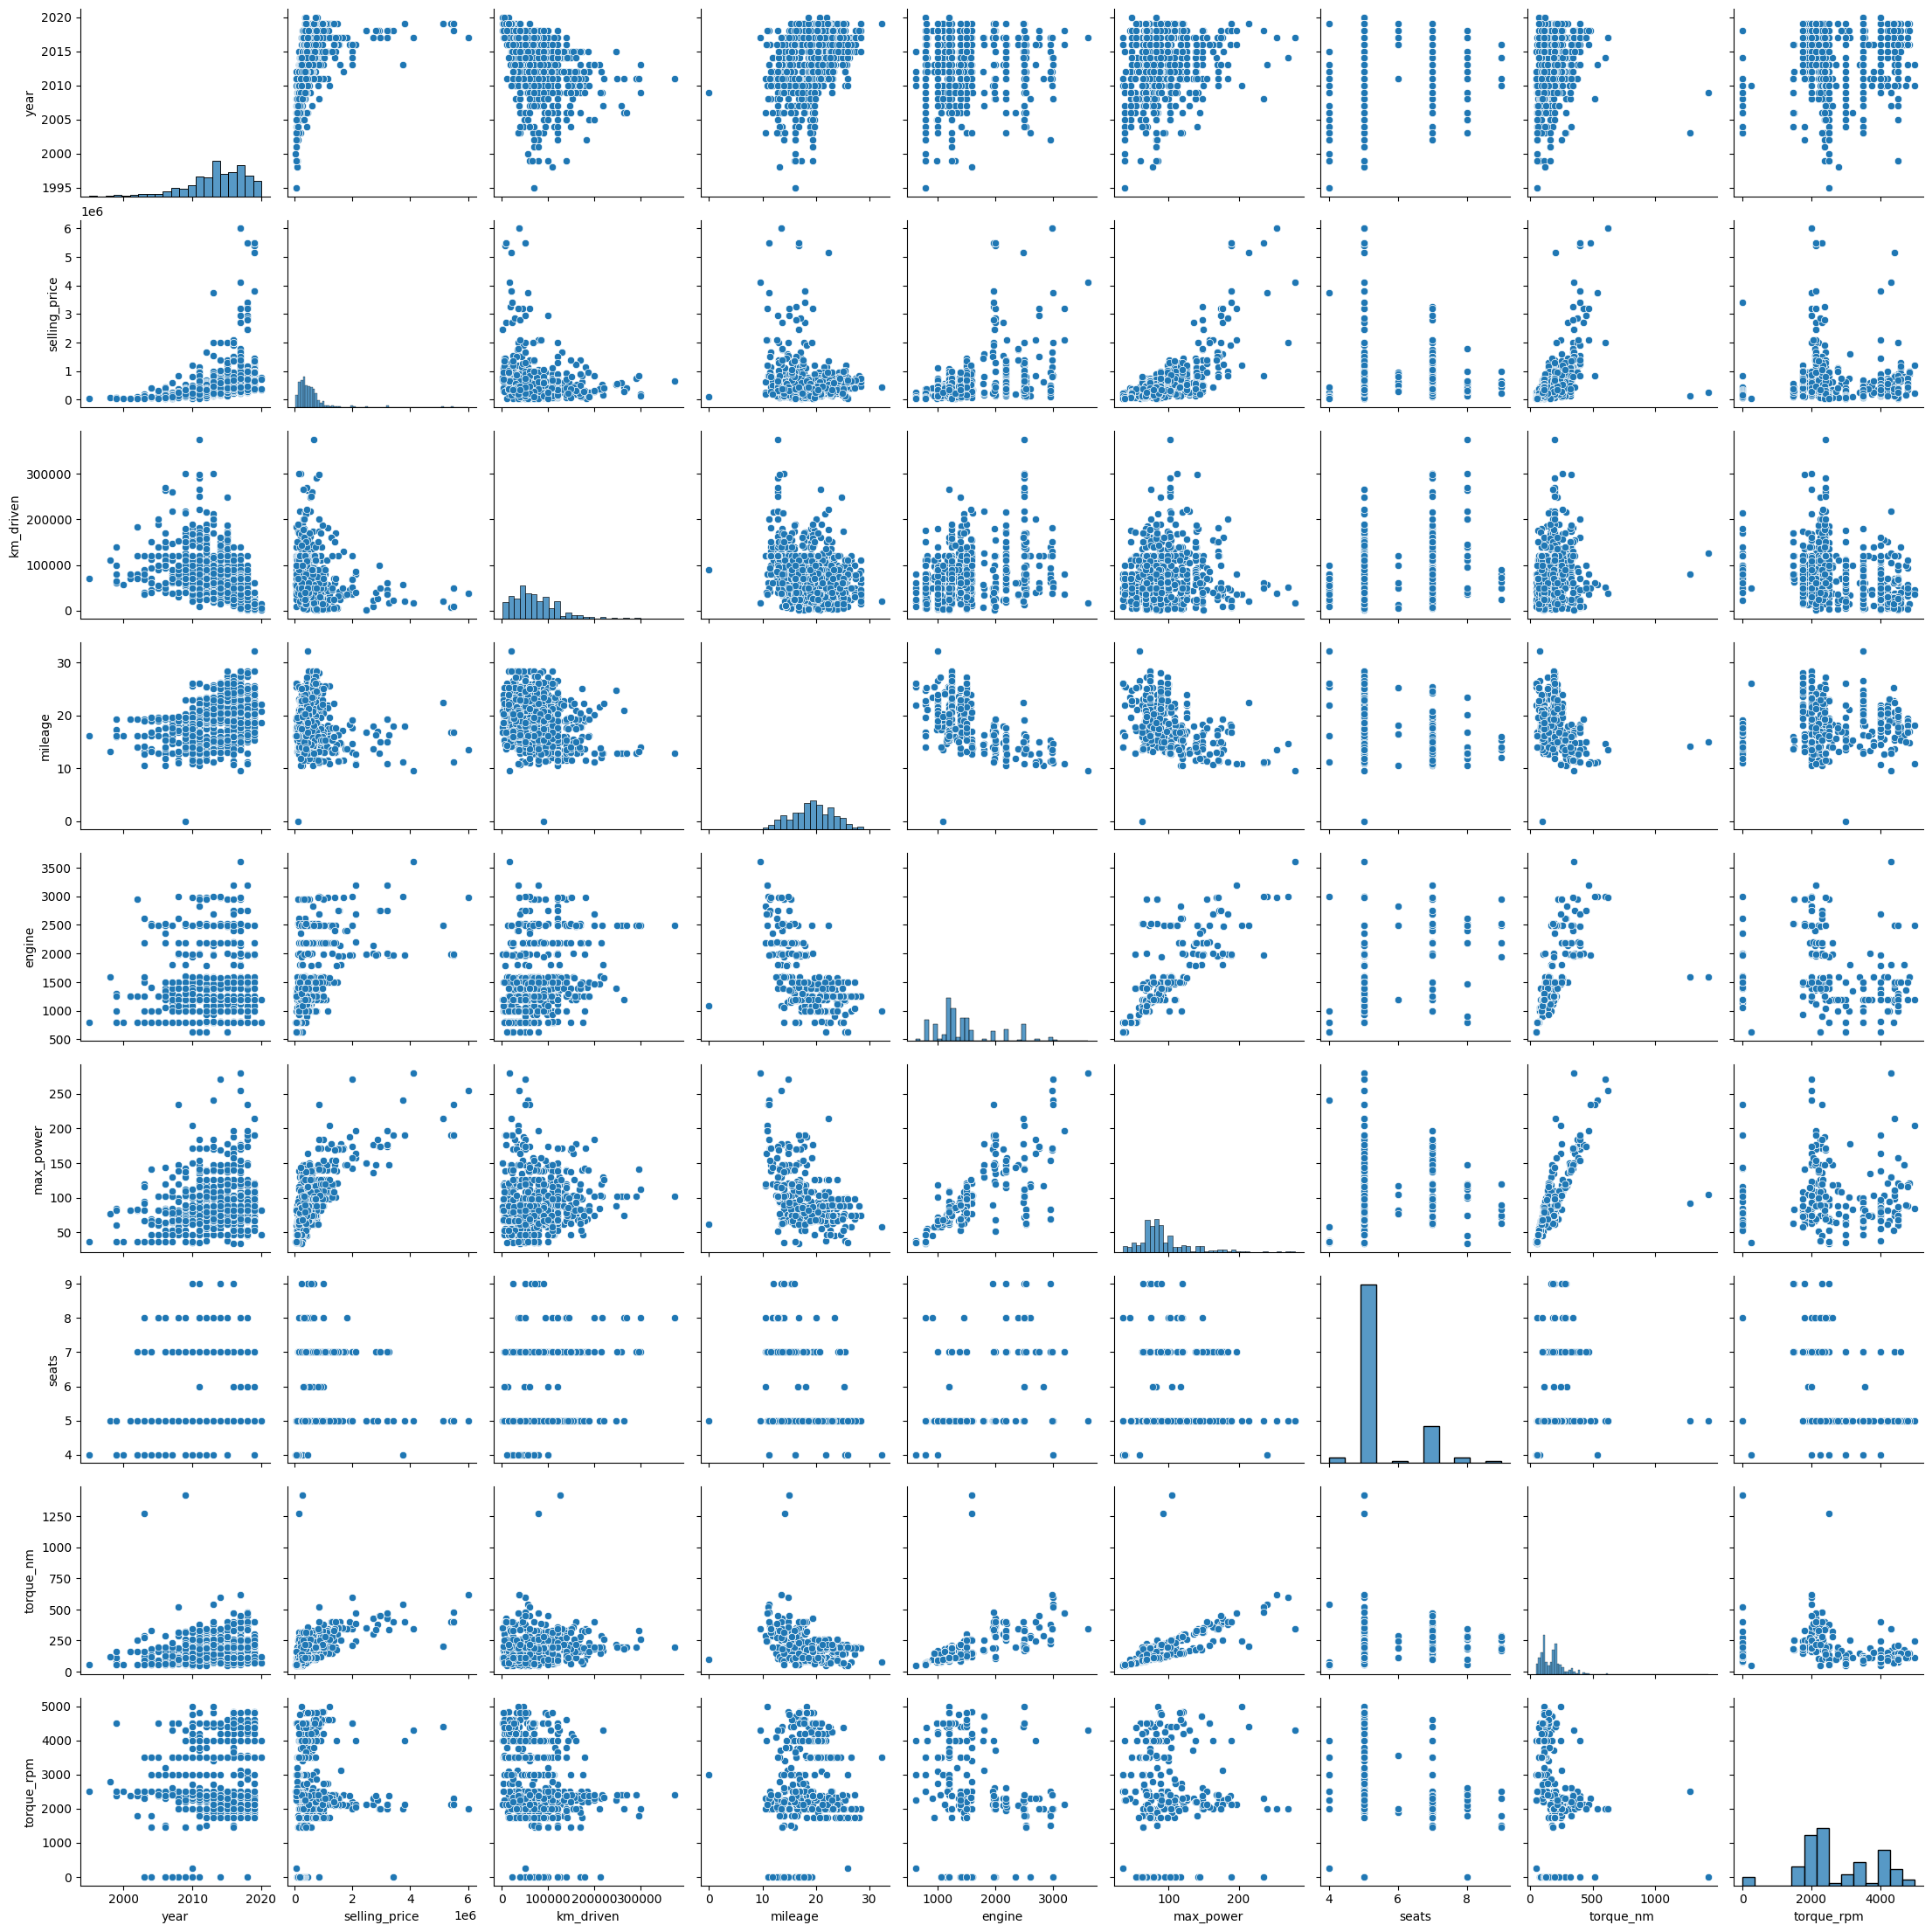

In [58]:
sns.pairplot(df_test)

In [59]:
#совокупности оказались похожими при разделении на трейн и тест

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [60]:
df_train.corr(numeric_only = True)

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.157138,0.041178,0.048388,0.204512
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.693742,0.149953,0.433318,-0.074686
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024539,0.192328,0.106585,-0.264138
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.374150,-0.451059,-0.226211,0.032506
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681968,0.652172,0.566209,-0.352716
max_power,0.157138,0.693742,0.024539,-0.374150,0.681968,1.000000,0.244017,0.617438,-0.128385
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244017,1.000000,0.298165,-0.238107
torque_nm,0.048388,0.433318,0.106585,-0.226211,0.566209,0.617438,0.298165,1.000000,-0.395398
torque_rpm,0.204512,-0.074686,-0.264138,0.032506,-0.352716,-0.128385,-0.238107,-0.395398,1.000000


<Axes: >

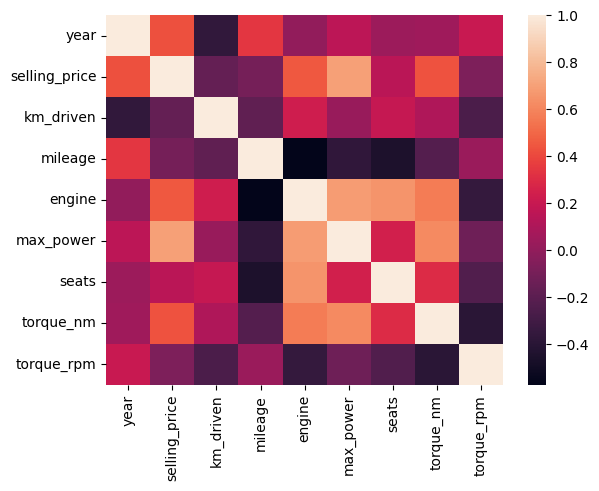

In [61]:
sns.heatmap(df_train.corr(numeric_only = True))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [62]:
# наименее скоррелированы между собой engine и year
# сильная положительная линейная зависимость наблюдается между max_power и selling_price, между engine и  max_power, engine и seats
# на данных прослеживается отрицательная корреляция между year и km_driven, поэтому такое предположение сделать можно. Хотя на графике практически не прослеживается эта зависимость

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [63]:
df_train['owner'].unique()


array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [64]:
df_train_one_hot = pd.get_dummies(df_train, 'owner')

In [65]:
df_train_one_hot.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm,owner_Ambassador CLASSIC 1500 DSL AC,...,owner_Dealer,owner_Individual,owner_Trustmark Dealer,owner_Automatic,owner_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248,74.00,5,190.00,2000.0,False,...,False,True,False,False,True,True,False,False,False,False
1,2014,370000,120000,21.14,1498,103.52,5,250.00,2000.0,False,...,False,True,False,False,True,False,False,True,False,False
2,2010,225000,127000,23.00,1396,90.00,5,219.52,2250.0,False,...,False,True,False,False,True,True,False,False,False,False
3,2007,130000,120000,16.10,1298,88.20,5,112.70,4.5,False,...,False,True,False,False,True,True,False,False,False,False
4,2017,440000,45000,20.14,1197,81.86,5,113.75,4000.0,False,...,False,True,False,False,True,True,False,False,False,False


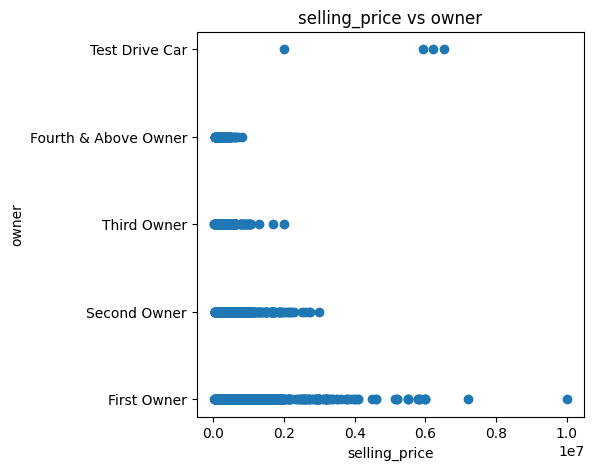

In [66]:
# важно посмотреть взаимосвязь selling_price с owner(количество владельцев авто), как правило в жизнее имеет место быть такая зависимость и потом как вариант сделать One-Hot кодирования
plt.figure(figsize=(5, 5))
plt.title('selling_price vs owner')
plt.scatter(df_train['selling_price'], df_train['owner'])
plt.xlabel('selling_price')
plt.ylabel('owner')
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
 12  torque_nm      5840 non-null   float64
 13  torque_rpm     5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [68]:
# запишем целевую переменную в y_train, а вещественные признаки - в X_train
y_train = df_train['selling_price']
X_train = df_train.drop(columns=df_train.select_dtypes(include='object').columns)
X_train = X_train.drop(['selling_price'], axis = 1)

In [69]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,2014,145500,23.40,1248,74.00,5,190.00,2000.0
1,2014,120000,21.14,1498,103.52,5,250.00,2000.0
2,2010,127000,23.00,1396,90.00,5,219.52,2250.0
3,2007,120000,16.10,1298,88.20,5,112.70,4.5
4,2017,45000,20.14,1197,81.86,5,113.75,4000.0


In [70]:
y_train.head()

,selling_price
0,450000
1,370000
2,225000
3,130000
4,440000


In [ ]:
assert X_train.shape == (5840, 8)

In [ ]:
# запишем целевую переменную в y_test, а вещественные признаки - в X_test
y_test = df_test['selling_price']
X_test = df_test.drop(columns=df_test.select_dtypes(include='object').columns)
X_test = X_test.drop(['selling_price'], axis = 1)

In [ ]:
X_test.head()

,year,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,2010,168000,14.0,2498,112.0,7,260.0,2000.0
1,2017,25000,21.5,1497,108.5,5,260.0,2125.0
2,2007,218463,12.9,1799,130.0,5,172.0,4300.0
3,2015,173000,25.1,1498,98.6,5,200.0,1750.0
4,2011,70000,16.5,1172,65.0,5,96.0,3000.0


In [ ]:
assert X_test.shape == (1000, 8)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error as RMSE
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_test = lr1.predict(X_test)
print(f'MSE_test = {MSE(y_test, pred_test)}')
print(f'R2_test = {r2_score(y_test, pred_test)}')

MSE_test = 231752847054.7187
R2_test = 0.5968313599220589


In [ ]:
pred_train = lr1.predict(X_train)
print(f'MSE_train = {MSE(y_train, pred_train)}')
print(f'R2_train = {r2_score(y_train, pred_train)}')

MSE_train = 115621991307.98964
R2_train = 0.5966276110503121


In [ ]:
# метрика качества MSE - тяжело сделать правильный вывод, но ошибка в тесте выше. Необходимо сделать RMSE для хоть какой-то интерпретации
# метрика R2 - практически идентичны и это неплохо.

In [ ]:
print(f'RMSE_test = {RMSE(y_test, pred_test)}')
print(f'RMSE_train = {RMSE(y_train, pred_train)}')

RMSE_test = 481407.1530988283
RMSE_train = 340032.33862088714


In [ ]:
# стоимость автомобиля на тесте на 141000 различается от трейна. На сколько большая ошибка тяжело интерепретировать, будет зависить от стоимости автомобиля
# если стоимость автомобиля высока, то данные ошибкит не критичны, а если стоимость автомобилч низкая, то критично

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
# станлартизируем и приведем к типу DataFrame
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train_x_scaler = scaler.transform(X_train)
test_x_scaler = scaler.transform(X_test)
train_x_scaler = pd.DataFrame(data=train_x_scaler, columns = X_train.columns)
test_x_scaler = pd.DataFrame(data=test_x_scaler, columns = X_test.columns)

In [ ]:
lr2 = LinearRegression()
lr2.fit(train_x_scaler, y_train)

LinearRegression()

In [ ]:
pred_test = lr2.predict(test_x_scaler)
print(f'MSE_test = {MSE(y_test, pred_test)}')
print(f'R2_test = {r2_score(y_test, pred_test)}')

MSE_test = 231752847054.7192
R2_test = 0.596831359922058


In [ ]:
pred_train = lr2.predict(train_x_scaler)
print(f'MSE_train = {MSE(y_train, pred_train)}')
print(f'R2_train = {r2_score(y_train, pred_train)}')

MSE_train = 115621991307.98964
R2_train = 0.5966276110503121


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
lr2.coef_

array([163702.73989166, -46992.77653686,  13412.11477285,  36555.03546699,
       326535.40659296, -24328.38265468,   2738.27645225, -36207.79757942])

In [ ]:
train_x_scaler.head()

,year,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,0.139570,1.191152,0.995867,-0.373643,-0.441753,-0.434419,0.120650,-0.635162
1,0.139570,0.766619,0.428830,0.141162,0.493159,-0.434419,0.634769,-0.635162
2,-0.837167,0.883158,0.895506,-0.068879,0.064974,-0.434419,0.373596,-0.408936
3,-1.569719,0.766619,-0.835712,-0.270682,0.007968,-0.434419,-0.541708,-2.440903
4,0.872122,-0.482007,0.177929,-0.478663,-0.192823,-0.434419,-0.532711,1.174650


In [ ]:
# наиболее информативным в предсказании цены оказался max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(train_x_scaler, y_train)

Lasso(alpha=1)

In [ ]:
pred_test = lasso.predict(test_x_scaler)
print(f'MSE_test = {MSE(y_test, pred_test)}')
print(f'R2_test = {r2_score(y_test, pred_test)}')

MSE_test = 231753527871.32025
R2_test = 0.5968301755400465


In [ ]:
pred_train = lasso.predict(train_x_scaler)
print(f'MSE_train = {MSE(y_train, pred_train)}')
print(f'R2_train = {r2_score(y_train, pred_train)}')

MSE_train = 115621991318.08136
R2_train = 0.596627611015105


In [ ]:
# коэффициенты не занулены, потому что они и так большие и разброс весов не сильно большой
lasso.coef_

array([163702.35565096, -46991.61066427,  13410.56129255,  36550.7960889 ,
       326536.25363497, -24325.52435308,   2738.10091226, -36207.13592153])

In [ ]:
lr2.coef_

array([163702.73989166, -46992.77653686,  13412.11477285,  36555.03546699,
       326535.40659296, -24328.38265468,   2738.27645225, -36207.79757942])

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': np.logspace(-4, 0, 50)  # Исследуем диапазон значений alpha от 0.0001 до 1
}
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv = 10)
# Запуск GridSearchCV
grid.fit(train_x_scaler, y_train)

# Результаты поиска
best_alpha = grid.best_params_['alpha']
print(grid.best_params_)

{'alpha': 1.0}


In [ ]:
# 10 моделей пришлось обучать
# лучший коэффициент = 1

In [ ]:
lasso2 = Lasso(alpha=1.0)
lasso2.fit(train_x_scaler, y_train)

Lasso()

In [ ]:
pred_train = lasso2.predict(train_x_scaler)
print('____Train____')
print(f'MSE_train = {MSE(y_train, pred_train)}')
print(f'R2_train = {r2_score(y_train, pred_train)}')

print('____Test____')
pred_test = lasso2.predict(test_x_scaler)
print(f'MSE_test = {MSE(y_test, pred_test)}')
print(f'R2_test = {r2_score(y_test, pred_test)}')

print(f'Коэффициенты: {lasso2.coef_}')

____Train____
MSE_train = 115621991318.08136
R2_train = 0.596627611015105
____Test____
MSE_test = 231753527871.32025
R2_test = 0.5968301755400465
Коэффициенты: [163702.35565096 -46991.61066427  13410.56129255  36550.7960889
 326536.25363497 -24325.52435308   2738.10091226 -36207.13592153]


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
param_grid = {
    'alpha': np.logspace(-4, 0, 50)  # Исследуем диапазон значений alpha от 0.0001 до 1
}
grid = GridSearchCV(estimator=elastic, param_grid=param_grid, scoring='r2', cv = 10)
# Запуск GridSearchCV
grid.fit(train_x_scaler, y_train)

# Результаты поиска
best_alpha = grid.best_params_['alpha']
print(grid.best_params_)

{'alpha': 0.22229964825261933}


In [ ]:
elastic1 = ElasticNet(alpha=0.22229964825261933)
elastic1.fit(train_x_scaler, y_train)

ElasticNet(alpha=0.22229964825261933)

In [ ]:
pred_train = elastic1.predict(train_x_scaler)
print('____Train____')
print(f'MSE_train = {MSE(y_train, pred_train)}')
print(f'R2_train = {r2_score(y_train, pred_train)}')

pred_test = elastic1.predict(test_x_scaler)
print('____Test____')
print(f'MSE_test = {MSE(y_test, pred_test)}')
print(f'R2_test = {r2_score(y_test, pred_test)}')

print(f'Коэффициенты: {elastic1.coef_}')

____Train____
MSE_train = 117341062635.88867
R2_train = 0.5906302579476275
____Test____
MSE_test = 245615723291.51776
R2_test = 0.5727148192582048
Коэффициенты: [151318.60452855 -48892.57275764  12736.04224469  62762.04525315
 267221.91564588 -27449.15117459  29052.26304462 -20577.54336497]


In [ ]:
# 10 моделей пришлось обучать
# лучший коэффициент = 0.22229964825261933

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
df_train = df_train.drop('name',axis=1)
df_test = df_test.drop('name',axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# assert df_train.shape == (5840, 10)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

categorical_features = df_train.select_dtypes(include=['object']).columns
one_hot_encoder.fit(df_train[categorical_features])
df_train_cat = one_hot_encoder.transform(df_train[categorical_features]).toarray()
df_train_cat = pd.DataFrame(df_train_cat, columns=one_hot_encoder.get_feature_names_out(categorical_features))

df_test_cat = one_hot_encoder.transform(df_test[categorical_features]).toarray()
df_test_cat = pd.DataFrame(df_test_cat, columns=one_hot_encoder.get_feature_names_out(categorical_features))

one_hot_encoder.fit(df_train[['seats']])
df_train_real = one_hot_encoder.transform(df_train[['seats']]).toarray()
df_train_real = pd.DataFrame(df_train_real, columns=one_hot_encoder.get_feature_names_out(['seats']))

df_test_real = one_hot_encoder.transform(df_test[['seats']]).toarray()
df_test_real = pd.DataFrame(df_test_real, columns=one_hot_encoder.get_feature_names_out(['seats']))

df_train_encoder = pd.concat([df_train_real, df_train_cat], axis=1)
df_test_encoder = pd.concat([df_test_real, df_test_cat], axis=1)

In [ ]:
df_train_encoder.head()

,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
# добавим закодированные категориалльные фичи
X_train_encoder = pd.concat([train_x_scaler.drop('seats',axis=1), df_train_encoder], axis=1)
X_test_encoder = pd.concat([test_x_scaler.drop('seats',axis=1), df_test_encoder], axis=1)

In [ ]:
X_train_encoder.head()

,year,km_driven,mileage,engine,max_power,torque_nm,torque_rpm,seats_4,seats_5,seats_6,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.139570,1.191152,0.995867,-0.373643,-0.441753,0.120650,-0.635162,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.428830,0.141162,0.493159,0.634769,-0.635162,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.837167,0.883158,0.895506,-0.068879,0.064974,0.373596,-0.408936,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.835712,-0.270682,0.007968,-0.541708,-2.440903,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.177929,-0.478663,-0.192823,-0.532711,1.174650,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# c one_hot
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {
    'alpha': np.logspace(-4, 0, 50)  # Исследуем диапазон значений alpha
}
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv = 10)
# Запуск GridSearchCV
grid.fit(X_train_encoder, y_train)

# Результаты поиска
best_alpha = grid.best_params_['alpha']
print(grid.best_params_)

{'alpha': 1.0}


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_encoder, y_train)

Ridge()

In [ ]:
pred_train = ridge.predict(X_train_encoder)
print('____Train____')
print(f'MSE_train = {MSE(y_train, pred_train)}')
print(f'R2_train = {r2_score(y_train, pred_train)}')

print('____Test____')
pred_test = ridge.predict(X_test_encoder)
print(f'MSE_test = {MSE(y_test, pred_test)}')
print(f'R2_test = {r2_score(y_test, pred_test)}')

print(f'Коэффициенты: {ridge.coef_}')

____Train____
MSE_train = 94967472965.10231
R2_train = 0.6686853771579946
____Test____
MSE_test = 209240301623.11884
R2_test = 0.635995290124858
Коэффициенты: [ 1.55529132e+05 -2.94089036e+04  3.57157526e+04  3.96261460e+04
  2.87809391e+05  1.92706303e+03 -3.37218800e+04  4.76299686e+05
 -9.58704599e+04 -1.86823662e+05 -8.88704456e+04 -4.32212716e+04
 -6.29506138e+04 -5.13380693e+04 -1.13792654e+05  3.22937226e+03
  1.61929463e+05 -3.91373291e+03 -1.03324420e+05 -1.12435134e+05
 -2.86558691e+05 -4.21982230e+04 -5.42143744e+04  2.61240005e+06
 -4.03328424e+04]


In [ ]:
# Предыдущие model = elastic: mse = 245615723291.51776 r2 = 0.5727148192582048
# Текущие: model = ridge: mse  = 209240301623.11884 r2 = 0.635995290124858
# качество прогнозов улучшилось.

In [ ]:
# без one_hot
ridge2 = Ridge()
param_grid = {
    'alpha': np.logspace(-4, 0, 50)  # Исследуем диапазон значений alpha
}
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv = 10)
# Запуск GridSearchCV
grid.fit(train_x_scaler, y_train)

# Результаты поиска
best_alpha = grid.best_params_['alpha']
print(grid.best_params_)

{'alpha': 1.0}


In [ ]:
ridge2 = Ridge(alpha=1.0)
ridge2.fit(train_x_scaler, y_train)

Ridge()

In [ ]:
pred_train = ridge2.predict(train_x_scaler)
print('____Train____')
print(f'MSE_train = {MSE(y_train, pred_train)}')
print(f'R2_train = {r2_score(y_train, pred_train)}')

print('____Test____')
pred_test = ridge2.predict(test_x_scaler)
print(f'MSE_test = {MSE(y_test, pred_test)}')
print(f'R2_test = {r2_score(y_test, pred_test)}')

print(f'Коэффициенты: {ridge2.coef_}')

____Train____
MSE_train = 115621998955.96173
R2_train = 0.5966275843687031
____Test____
MSE_test = 231774766919.7351
R2_test = 0.5967932270478282
Коэффициенты: [163682.23721898 -46999.36439817  13415.12921805  36638.42491223
 326400.55475404 -24350.83440152   2798.3581871  -36168.73926814]


In [ ]:
# c one-hot =  ridge: mse  = 209240301623.11884 r2 = 0.635995290124858
# без one_hot: ridge2: mse  = 231774766919.7351 r2 = 0.5967932270478282
# качество прогнозов улучшилось.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
  count = 0
  for i in range(len(y_pred)):
    if (abs(100 - (y_pred[i] * 100) / y_true[i])) <= 10:
      count += 1
  return count

# business_metric(# your code here)

In [ ]:
y_pred_lr = lr2.predict(test_x_scaler)
y_pred_lasso = lasso.predict(test_x_scaler)
y_pred_elastic = elastic1.predict(test_x_scaler)
y_pred_ridge = ridge2.predict(test_x_scaler)

In [ ]:
print(f'Linear регрессия: {business_metric(y_test, y_pred_lr)}')
print(f'Lasso регрессия: {business_metric(y_test, y_pred_lasso)}')
print(f'Elastic регрессия: {business_metric(y_test, y_pred_elastic)}')
print(f'Ridge регрессия: {business_metric(y_test, y_pred_ridge)}')

Linear регрессия: 232
Lasso регрессия: 232
Elastic регрессия: 242
Ridge регрессия: 233


In [ ]:
# Elastic лучше всего решает задачу бизнеса

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
# сохраним модель в файл для использования ее в сервисе.
import joblib
from google.colab import files
joblib.dump(lr1, 'lr_model.pkl')
files.download('lr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# создадим .pickle-файлы с сохранёнными весами для каждой модели, для удобства один файл для одной модели
model_data_lr = {
    'model': lr2,
    'scaler': scaler
}
joblib.dump(model_data_lr, 'lr2_scaller_model.pkl')
files.download('lr2_scaller_model.pkl')

model_data_lasso = {
    'model': lasso,
    'scaler': scaler
}
joblib.dump(model_data_lasso, 'lasso_scaller_model.pkl')
files.download('lasso_scaller_model.pkl')

model_data_elastic = {
    'model': elastic1,
    'scaler': scaler
}
joblib.dump(model_data_elastic, 'elastic_scaller_model.pkl')
files.download('elastic_scaller_model.pkl')

model_data_ridge_one_hot = {
    'model': ridge,
    'one_hot': one_hot_encoder
}
joblib.dump(model_data_ridge_one_hot, 'ridge_one_hot_model.pkl')
files.download('ridge_one_hot_model.pkl')

model_data_ridge = {
    'model': ridge2,
    'scaler': scaler
}
joblib.dump(model_data_ridge, 'ridge_scaller_model.pkl')
files.download('ridge_scaller_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

